## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import classifier_evaluation as clev
import nested_cross_validation as ncv

##  Dataframe load 

## Setting X and Y for modeling

In [3]:
X = pd.read_csv('molecule_descriptors_lvhc.csv', index_col = [0])

In [4]:
Y = pd.read_csv('molecule_pIC50.csv', index_col = [0]).bioactivity_class

## External and Internal set

In [5]:
internal_x, external_x, internal_y, external_y = train_test_split(X, Y, shuffle = True, stratify = Y, random_state = 42, test_size = 0.2)

## Train and test from internal

In [6]:
train_x, test_x, train_y, test_y = train_test_split(internal_x, internal_y, shuffle = True, stratify = internal_y, random_state = 42, test_size = 0.2)

## Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf = RandomForestClassifier(n_estimators = 1000)

In [9]:
model = rf.fit(internal_x, internal_y)

In [10]:
y_pred = model.predict(external_x)

In [11]:
y_proba = model.predict_proba(external_x)

## Evaluation

### Scores

In [12]:
df_classifier_scores = clev.classifier_scoring(external_y, y_pred)

In [13]:
df_classifier_scores

,parameter,value
0,accuracy,0.877193
1,balanced_accuracy,0.857792
2,average_precision,0.779107
3,neg_brier_score,0.122807
4,f1,0.829268
5,precision,0.894737
6,recall,0.772727
7,jaccard,0.708333
8,roc_auc,0.857792
9,G-mean,0.728571


### TP, TN, FP, FN Metrics

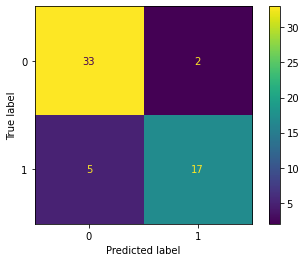

In [14]:
clev.plot_cm(external_y, y_pred)

In [15]:
df_pos_neg_scores = clev.pn_rate_df(external_y, y_pred)

In [16]:
df_pos_neg_scores

,parameter,value
0,True_Positive_Rate,0.772727
1,True_Negative_Rate,0.942857
2,Positive_predictive_value,0.894737
3,Negative_Predictive_Value,0.868421
4,False_Positive_Rate,0.057143
5,False_Negative_Rate,0.227273
6,False_Discovery_Rate,0.090909
7,Overall_Accuracy,0.877193


## Nested Cross Validation

### Nested Cross Validation Training

In [17]:
model_list = ncv.nested_cv(internal_x, internal_y)

>acc=0.826, est=0.811, cfg={'criterion': 'gini', 'max_features': 4, 'n_estimators': 10}
>acc=0.783, est=0.847, cfg={'criterion': 'gini', 'max_features': 4, 'n_estimators': 10}
>acc=0.696, est=0.846, cfg={'criterion': 'entropy', 'max_features': 2, 'n_estimators': 10}
>acc=0.783, est=0.832, cfg={'criterion': 'gini', 'max_features': 4, 'n_estimators': 10}
>acc=0.913, est=0.832, cfg={'criterion': 'entropy', 'max_features': 2, 'n_estimators': 100}
>acc=0.955, est=0.813, cfg={'criterion': 'gini', 'max_features': 6, 'n_estimators': 100}
>acc=0.864, est=0.842, cfg={'criterion': 'gini', 'max_features': 4, 'n_estimators': 500}
>acc=0.773, est=0.837, cfg={'criterion': 'gini', 'max_features': 6, 'n_estimators': 500}
>acc=0.909, est=0.847, cfg={'criterion': 'entropy', 'max_features': 4, 'n_estimators': 100}
>acc=0.727, est=0.857, cfg={'criterion': 'gini', 'max_features': 2, 'n_estimators': 10}


In [18]:
ensemble_list = ncv.ensemble_predict(model_list, external_x)

In [19]:
final_pred = ncv.binary_pred(ensemble_list)

## Evaluation of nested cross validated ensemble model

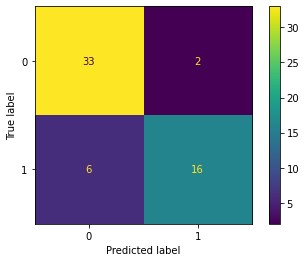

In [20]:
clev.plot_cm(external_y, final_pred)

In [21]:
df_cvn_evaluation = clev.classifier_scoring(external_y, final_pred)

In [22]:
df_cvn_evaluation

,parameter,value
0,accuracy,0.859649
1,balanced_accuracy,0.835065
2,average_precision,0.751728
3,neg_brier_score,0.140351
4,f1,0.800000
5,precision,0.888889
6,recall,0.727273
7,jaccard,0.666667
8,roc_auc,0.835065
9,G-mean,0.685714


In [23]:
df_cvn_evaluation = clev.pn_rate_df(external_y, final_pred)

In [24]:
df_cvn_evaluation

,parameter,value
0,True_Positive_Rate,0.727273
1,True_Negative_Rate,0.942857
2,Positive_predictive_value,0.888889
3,Negative_Predictive_Value,0.846154
4,False_Positive_Rate,0.057143
5,False_Negative_Rate,0.272727
6,False_Discovery_Rate,0.090909
7,Overall_Accuracy,0.859649


In [25]:
from pickle import dump

In [26]:
for i in range(len(model_list)):
    dump(model_list[i],open(f'model_molecule{i}.pkl','wb'))

## Cross Validation

In [27]:
kfoldcv_df = clev.k_fold_cv_evaluation(model_list, internal_x, internal_y, scores = clev.scoring, scores_name = clev.scoring_, k = 5)

In [28]:
kfoldcv_df

,parameter,value
0,accuracy,0.812000
1,average_precision,0.858434
2,neg_brier_score,-0.131532
3,f1,0.745617
4,neg_log_loss,-0.728885
5,precision,0.782823
6,sensitivity,0.716340
7,specificity,0.872116
8,MCC,0.600430
9,jaccard,0.601122
